In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Loading and preprocessing the data

In [2]:
# loading datasets
seattle_house_prices = pd.read_csv('seattle/seattle_housing_prices.csv')
bangalore_house_prices = pd.read_csv('bangalore/bangalore_housing_prices.csv')
beijing_house_prices = pd.read_csv('beijing/beijing_housing_prices.csv', engine='python')
car_prices = pd.read_csv('car_prices/CarPrice_Assignment.csv')
used_car_prices = pd.read_csv('used_car_prices/train-data.csv')

In [3]:
# preprocessing of seattle_house_prices
seattle_house_prices['date'] = pd.to_datetime(seattle_house_prices['date'])
seattle_house_prices['day'] = seattle_house_prices['date'].dt.day
seattle_house_prices['month'] = seattle_house_prices['date'].dt.month
seattle_house_prices['year'] = seattle_house_prices['date'].dt.year
seattle_house_prices['seattle'] = [1 if city == 'Seattle' else 0 for city in seattle_house_prices['city']]
seattle_house_prices = seattle_house_prices.drop(['date', 'street', 'country', 'city', 'statezip'], axis=1)

In [4]:
# preprocessing of bangalore_house_prices
bangalore_house_prices = bangalore_house_prices[:1951]
bangalore_house_prices = bangalore_house_prices.drop(['Location'], axis=1)
bangalore_house_prices.rename(columns={'Price': 'price'}, inplace=True)

In [5]:
# preprocessing of beijing_house_prices
beijing_house_prices['DOM'] = beijing_house_prices['DOM'].fillna(1).astype(int)
beijing_house_prices['tradeTime'] = pd.to_datetime(beijing_house_prices['tradeTime'])
beijing_house_prices['tradeTimeDay'] = beijing_house_prices['tradeTime'].dt.day
beijing_house_prices['tradeTimeMonth'] = beijing_house_prices['tradeTime'].dt.month
beijing_house_prices['tradeTimeYear'] = beijing_house_prices['tradeTime'].dt.year
beijing_house_prices['livingRoom'] = beijing_house_prices['livingRoom'].replace('#NAME?', 0).astype(int)
beijing_house_prices['drawingRoom'] = beijing_house_prices['drawingRoom'].str.split().str[1].fillna(6).astype(int)
beijing_house_prices.loc[~beijing_house_prices['bathRoom'].isin(['0', '1', '2', '3', '4', '5', '6', '7']), 'bathRoom'] = 1
beijing_house_prices['bathRoom'] = beijing_house_prices['bathRoom'].astype(int)
beijing_house_prices['floor'] = beijing_house_prices['floor'].str.split().str[1].fillna(6).astype(int)
beijing_house_prices['buildingType1'] = [1 if buildingType == 1 else 0 for buildingType in beijing_house_prices['buildingType']]
beijing_house_prices['buildingType3'] = [1 if buildingType == 3 else 0 for buildingType in beijing_house_prices['buildingType']]
beijing_house_prices['buildingType4'] = [1 if buildingType == 4 else 0 for buildingType in beijing_house_prices['buildingType']]
beijing_house_prices['constructionTime'] = beijing_house_prices['constructionTime'].replace('Î´Öª', 2004).astype(int)
beijing_house_prices['elevator'] = beijing_house_prices['elevator'].fillna(0).astype(int)
beijing_house_prices['fiveYearsProperty'] = beijing_house_prices['fiveYearsProperty'].fillna(1).astype(int)
beijing_house_prices['subway'] = beijing_house_prices['subway'].fillna(1).astype(int)
beijing_house_prices['communityAverage'] = beijing_house_prices['communityAverage'].fillna(int(beijing_house_prices['communityAverage'].mean())).astype(int)
beijing_house_prices['renovationCondition1'] = [1 if renovationCondition == 1 else 0 for renovationCondition in beijing_house_prices['renovationCondition']]
beijing_house_prices['renovationCondition3'] = [1 if renovationCondition == 3 else 0 for renovationCondition in beijing_house_prices['renovationCondition']]
beijing_house_prices['renovationCondition4'] = [1 if renovationCondition == 4 else 0 for renovationCondition in beijing_house_prices['renovationCondition']]
beijing_house_prices['buildingStructure2'] = [1 if buildingStructure == 2 else 0 for buildingStructure in beijing_house_prices['buildingStructure']]
beijing_house_prices['buildingStructure6'] = [1 if buildingStructure == 6 else 0 for buildingStructure in beijing_house_prices['buildingStructure']]
beijing_house_prices = beijing_house_prices.drop(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'price', 
                                                  'buildingType', 'renovationCondition', 'buildingStructure', 
                                                  'district'], axis=1)
beijing_house_prices.rename(columns={'totalPrice': 'price'}, inplace=True)

In [6]:
# preprocessing of car_prices
car_prices['gas_fueltype'] = [1 if fueltype == 'gas' else 0 for fueltype in car_prices['fueltype']]
car_prices['std_aspiration'] = [1 if aspiration == 'std' else 0 for aspiration in car_prices['aspiration']]
car_prices['doornumber'] = [4 if doornumber == 'four' else 2 for doornumber in car_prices['doornumber']]
car_prices['sedan_carbody'] = [1 if carbody == 'sedan' else 0 for carbody in car_prices['carbody']]
car_prices['hatchback_carbody'] = [1 if carbody == 'hatchback' else 0 for carbody in car_prices['carbody']]
car_prices['wagon_carbody'] = [1 if carbody == 'wagon' else 0 for carbody in car_prices['carbody']]
car_prices['fwd_drivewheel'] = [1 if drivewheel == 'fwd' else 0 for drivewheel in car_prices['drivewheel']]
car_prices['ohc_enginetype'] = [1 if enginetype == 'ohc' else 0 for enginetype in car_prices['enginetype']]
car_prices['four_cylinders'] = [1 if cylinders == 'four' else 0 for cylinders in car_prices['cylindernumber']]
car_prices['mpfi_fuelsystem'] = [1 if fuelsystem == 'mpfi' else 0 for fuelsystem in car_prices['fuelsystem']]
car_prices['2bbl_fuelsystem'] = [1 if fuelsystem == '2bbl' else 0 for fuelsystem in car_prices['fuelsystem']]
car_prices = car_prices.drop(['car_ID', 'CarName', 'enginelocation', 'fueltype', 'aspiration', 'doornumber',
                              'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem'], axis=1)

In [7]:
# preprocessing of used_car_prices
used_car_prices = pd.concat([used_car_prices, pd.get_dummies(used_car_prices['Location'])], axis=1)
used_car_prices['Engine'][used_car_prices['Engine'].replace(used_car_prices['Engine'].value_counts().to_dict()) < 100] = 'other engine'
used_car_prices = pd.concat([used_car_prices, pd.get_dummies(used_car_prices['Engine'])], axis=1)
used_car_prices['diesel_fueltype'] = [1 if fueltype == 'Diesel' else 0 for fueltype in used_car_prices['Fuel_Type']]
used_car_prices['petrol_fueltype'] = [1 if fueltype == 'Petrol' else 0 for fueltype in used_car_prices['Fuel_Type']]
used_car_prices['manual_transmission'] = [1 if transmission == 'Manual' else 0 for transmission in used_car_prices['Transmission']]
used_car_prices['Owner_Type'] = used_car_prices['Owner_Type'].map({'First': 1, 'Second': 2, 'Third': 2, 'Fourth & Above': 4})
used_car_prices['Mileage'] = used_car_prices['Mileage'].str.split().str[0].astype(float).fillna(0)
power_mean = used_car_prices['Power'].str.split().str[0][used_car_prices['Power'] != 'null bhp'].astype(float).mean()
used_car_prices['Power'] = used_car_prices['Power'].str.split().str[0].replace('null', power_mean).fillna(power_mean).astype(float)
new_price_mean = used_car_prices['New_Price'].str.split().str[0].iloc[used_car_prices['New_Price'].dropna().index].astype(float).mean()
used_car_prices['New_Price'] = used_car_prices['New_Price'].str.split().str[0].fillna(new_price_mean).astype(float)
used_car_prices['Seats'].fillna(used_car_prices['Seats'].mode()[0], inplace=True)
used_car_prices['Seats'] = used_car_prices['Seats'].astype(int)
used_car_prices = used_car_prices.drop(['Unnamed: 0', 'Name', 'Location', 'Engine', 'Fuel_Type', 'Transmission'], axis=1)
used_car_prices.rename(columns={'Price': 'price'}, inplace=True)

C:\Users\Juhaninho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
# Printing the shapes of the preprocessed datasets
print('seattle_house_prices: ' + str(seattle_house_prices.shape))
print('bangalore_house_prices: ' + str(bangalore_house_prices.shape))
print('beijing_house_prices: ' + str(beijing_house_prices.shape))
print('car_prices: ' + str(car_prices.shape))
print('used_car_prices: ' + str(used_car_prices.shape))

seattle_house_prices: (4600, 17)
bangalore_house_prices: (1951, 39)
beijing_house_prices: (318851, 26)
car_prices: (205, 25)
used_car_prices: (6019, 41)


Train-Test-Split

In [9]:
# splitting the datasets in train and test set
def split_dataset(data, target='price'):
    X_train, X_test, y_train, y_test = train_test_split(data.drop(target, axis=1), data[target], test_size=0.2, random_state=8)
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

seattle_house_prices_train, seattle_house_prices_test = split_dataset(seattle_house_prices)
bangalore_house_prices_train, bangalore_house_prices_test = split_dataset(bangalore_house_prices)
beijing_house_prices_train, beijing_house_prices_test = split_dataset(beijing_house_prices)
car_prices_train, car_prices_test = split_dataset(car_prices)
used_car_prices_train, used_car_prices_test = split_dataset(used_car_prices)
data_trainsets = [seattle_house_prices_train, bangalore_house_prices_train, beijing_house_prices_train,
                  car_prices_train, used_car_prices_train]
data_testsets = [seattle_house_prices_test, bangalore_house_prices_test, beijing_house_prices_test,
                 car_prices_test, used_car_prices_test]
dataset_names = ['seattle_house_prices', 'bangalore_house_prices', 'beijing_house_prices',
                 'car_prices', 'used_car_prices']

Definition of the Feature Selection Methods

In [10]:
# All-in
def no_feature_selection(data, target_name = 'price'):
    all_features = data.columns.tolist()
    all_features.remove(target_name)
    return all_features

In [11]:
# Forward Selection
def forward_selection(data, target_name = 'price', significance_level = 0.05):
    initial_features = data.columns.tolist()
    initial_features.remove(target_name)
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)
        for new_column in remaining_features:
            model = sm.OLS(data[target_name], sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value < significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [12]:
# Backward Elimination
def backward_elimination(data, target_name = 'price', significance_level = 0.05):
    features = data.columns.tolist()
    features.remove(target_name)
    while len(features) > 0:
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(data[target_name], features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [13]:
# Bi-directional Elimination
def bidirectional_elimination(data, target_name = 'price', SL_in = 0.05, SL_out = 0.05):
    initial_features = data.columns.tolist()
    initial_features.remove(target_name)
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)
        for new_column in remaining_features:
            model = sm.OLS(data[target_name], sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < SL_in:
            best_features.append(new_pval.idxmin())
            while len(best_features) > 0:
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(data[target_name], best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if max_p_value >= SL_out:
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [14]:
# Correlation-based Feature Selection
def corr_feature_selection(data, target_name = 'price', significance_level = 0.05, corr_out = 0.75):
    initial_features = data.columns.tolist()
    initial_features.remove(target_name)
    # add all features that are correlated to the target variable (Relevance Analysis)
    relevant_features = []
    for feature in initial_features:
        corr, p_value = pearsonr(data[feature], data[target_name])
        if p_value <= significance_level:
            relevant_features.append(feature)
    # remove one feature if it is correlated to another feature (Redundancy Analysis)
    redundant_features = []
    for i in range(len(relevant_features)):
        for j in range(i+1, len(relevant_features)):
            corr, p_value = pearsonr(data[relevant_features[i]], data[relevant_features[j]])
            if (np.abs(corr) >= corr_out) & (p_value <= significance_level):
                redundant_features.append(relevant_features[i])
                break
    best_features = list(set(relevant_features) - set(redundant_features))
    return best_features

In [15]:
selected_features = {}
fs_methods = [no_feature_selection, forward_selection, backward_elimination, bidirectional_elimination,
              corr_feature_selection]
for fs_method in fs_methods:
    i = 0
    for data in data_trainsets:
        selected_features[dataset_names[i] + ' - ' + fs_method.__name__] = fs_method(data)
        i += 1

C:\Users\Juhaninho\Anaconda3\lib\site-packages\scipy\stats\stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [16]:
# selected_features

Creation of a DataFrame for the selected features

In [17]:
def df_selected_features(dataset_name):
    global selected_features
    fs_methods = [fs_method for fs_method in list(selected_features.keys()) if fs_method.startswith(dataset_name)]
    df_columns = selected_features[dataset_name + ' - no_feature_selection']
    df_features = pd.DataFrame()
    fs_names = []
    for fs_method in fs_methods:
        fs_name = fs_method.split(' - ')[1].strip()
        fs_names.append(fs_name)
        row = ['X' if col in selected_features[dataset_name + ' - ' + fs_name] else '' for col in df_columns]
        df_features = df_features.append(pd.Series(row), ignore_index=True)
    fs_names = pd.Series(fs_names).map({'no_feature_selection': 'Keine Feature Selection', 
                                        'forward_selection': 'Vorwärtsauswahl',
                                        'backward_elimination': 'Rückwärtselimination', 
                                        'bidirectional_elimination': 'Bidirektionale Elimination',
                                        'corr_feature_selection': 'Korrelationsbasiert'}).tolist()
    df_features.columns = df_columns
    df_features.index = fs_names
    return df_features

In [18]:
df_features = {}
for dataset_name in dataset_names:
    df_features[dataset_name] = df_selected_features(dataset_name)

In [19]:
df_features['used_car_prices']

,Year,Kilometers_Driven,Owner_Type,Mileage,Power,Seats,New_Price,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,1086 CC,1197 CC,1198 CC,1199 CC,1248 CC,1396 CC,1461 CC,1497 CC,1498 CC,1582 CC,1598 CC,1968 CC,1995 CC,2143 CC,2179 CC,2494 CC,796 CC,998 CC,other engine,diesel_fueltype,petrol_fueltype,manual_transmission
Keine Feature Selection,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X
Vorwärtsauswahl,X,X,,X,X,X,X,,X,,X,,X,,,X,X,,X,X,X,X,,X,X,,X,X,,,X,X,,X,X,X,X,X,X,X
Rückwärtselimination,X,X,,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X,,,,X,X,X,X,X,X,X,X,X,X,X,X,X,X,,X,X,X
Bidirektionale Elimination,X,X,,X,X,X,X,,X,,X,,X,,,X,X,,X,X,X,,,X,X,,X,X,,,X,X,,X,X,X,X,X,X,X
Korrelationsbasiert,X,X,X,X,X,X,X,,X,X,X,,,X,X,X,,X,X,X,X,X,X,X,X,X,X,,X,X,X,X,X,,X,X,X,,X,X


Plots of the selected features

In [20]:
def plot_selected_features(dataset_name):
    global selected_features
    fs_methods = [fs_method for fs_method in list(selected_features.keys()) if fs_method.startswith(dataset_name)]
    fs_names = []
    features = []
    for fs_method in fs_methods:
        fs_name = fs_method.split(' - ')[1].strip()
        fs_names.extend(str(len(selected_features[dataset_name + ' - ' + fs_name]) * str(fs_name + ' ')).strip().split())
        features.extend(selected_features[dataset_name + ' - ' + fs_name])
    fs_names = pd.Series(fs_names).map({'no_feature_selection': 'Keine FS', 
                                        'forward_selection': 'Vorwärts-\nauswahl',
                                        'backward_elimination': 'Rückwärts-\nelimination', 
                                        'bidirectional_elimination': 'Bidirektionale\nElimination',
                                        'corr_feature_selection': 'Korrelation'}).tolist()
    plt.figure(figsize=(12,len(np.unique(features))/2))
    plt.rcParams.update({'font.size': 14})
    plt.scatter(fs_names, features, c='blue')
    plt.title('Ausgewählte Features für ' + dataset_name)
    plt.xlabel('Feature Selection Methode', fontweight='bold')
    plt.ylabel('Features', fontweight='bold')
    plt.show()

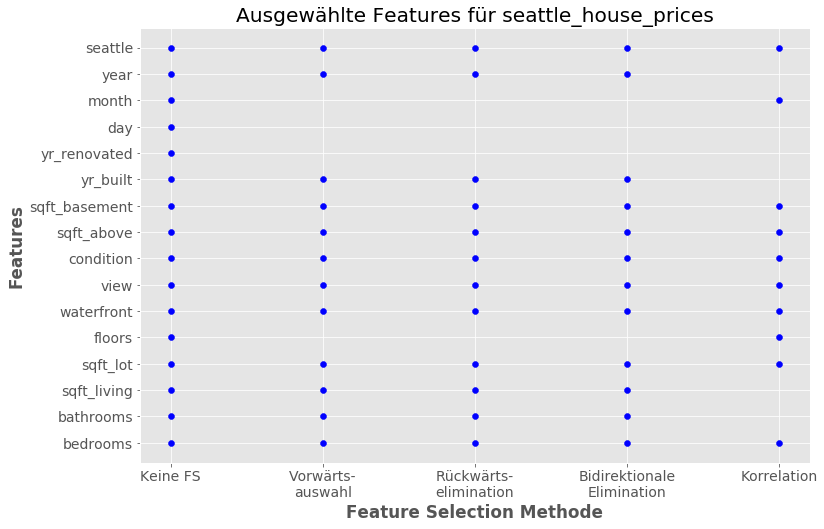

In [21]:
plot_selected_features('seattle_house_prices')

In [22]:
#for dataset_name in dataset_names:
#    plot_selected_features(dataset_name)

Getting the model accuracies for the selected feature sets

In [23]:
# Getting the accuracy for one dataset and one model in dependence of the selected features
def get_r2_score(data_train, data_test, features, target='price', model=LinearRegression(), degree=1):
    X_train = data_train[features]
    y_train = data_train[target]
    X_test = data_test[features]
    y_test = data_test[target]
    if degree > 1:
        poly = PolynomialFeatures(degree=degree)
        X_train = poly.fit_transform(X_train)
        X_test = poly.transform(X_test)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred[pred < 0] = 0
    r2 = r2_score(pred, y_test)
    adj_r2 = 1-(1-r2)*(len(data_train)-1)/(len(data_train)-len(features)-1)
    return adj_r2

In [24]:
# Getting the accuracies for all feature selection methods with all datasets an one model
def get_r2_scores_all_data(model=LinearRegression(), degree=1):
    global data_trainsets, data_testsets, dataset_names, selected_features
    r2_scores = {}
    i = 0
    for data_train, data_test in zip(data_trainsets, data_testsets):
        for data_fs, features in selected_features.items():
            dataset_name = data_fs.split(' - ')[0].strip()
            fs_technique = data_fs.split(' - ')[1].strip()
            if dataset_name == dataset_names[i]:
                r2_scores[data_fs] = get_r2_score(data_train, data_test, features, model=model, degree=degree)
        i += 1
    return r2_scores

Linear Regression

In [25]:
r2_scores_lin_reg = get_r2_scores_all_data(model=LinearRegression())

In [26]:
r2_scores_lin_reg

{'bangalore_house_prices - backward_elimination': 0.8003954396655719,
 'bangalore_house_prices - bidirectional_elimination': 0.7992885190861023,
 'bangalore_house_prices - corr_feature_selection': 0.799210369847793,
 'bangalore_house_prices - forward_selection': 0.7992885190861023,
 'bangalore_house_prices - no_feature_selection': 0.796560037956813,
 'beijing_house_prices - backward_elimination': 0.715673047660629,
 'beijing_house_prices - bidirectional_elimination': 0.7156730476605797,
 'beijing_house_prices - corr_feature_selection': 0.7154543716749848,
 'beijing_house_prices - forward_selection': 0.7156920612060478,
 'beijing_house_prices - no_feature_selection': 0.7157211252928033,
 'car_prices - backward_elimination': 0.7739024498083784,
 'car_prices - bidirectional_elimination': 0.7646281909787094,
 'car_prices - corr_feature_selection': 0.7076100720588163,
 'car_prices - forward_selection': 0.7716695623368769,
 'car_prices - no_feature_selection': 0.7538897849331225,
 'seattle_h

Polynomial Regression with degree two

In [27]:
r2_scores_poly = get_r2_scores_all_data(model=LinearRegression(), degree=2)

In [28]:
r2_scores_poly

{'bangalore_house_prices - backward_elimination': 0.7860011314380226,
 'bangalore_house_prices - bidirectional_elimination': 0.7858748346369331,
 'bangalore_house_prices - corr_feature_selection': 0.7548985097292875,
 'bangalore_house_prices - forward_selection': 0.7858748346369331,
 'bangalore_house_prices - no_feature_selection': 0.7360775572735883,
 'beijing_house_prices - backward_elimination': 0.8988397742221903,
 'beijing_house_prices - bidirectional_elimination': 0.8988400729287349,
 'beijing_house_prices - corr_feature_selection': 0.8987630075513037,
 'beijing_house_prices - forward_selection': 0.8994586443091831,
 'beijing_house_prices - no_feature_selection': 0.8939902916303324,
 'car_prices - backward_elimination': 0.14264380771790286,
 'car_prices - bidirectional_elimination': 0.8327275215639218,
 'car_prices - corr_feature_selection': 0.7110719235763294,
 'car_prices - forward_selection': 0.6898386099280494,
 'car_prices - no_feature_selection': -0.19211222930873095,
 'sea

Random Forest Regression

In [29]:
r2_scores_r_forest = get_r2_scores_all_data(model=RandomForestRegressor(n_estimators=10, random_state=8))

In [30]:
r2_scores_r_forest

{'bangalore_house_prices - backward_elimination': 0.8388840667217585,
 'bangalore_house_prices - bidirectional_elimination': 0.8359144242078049,
 'bangalore_house_prices - corr_feature_selection': 0.850208690808491,
 'bangalore_house_prices - forward_selection': 0.8359144242078049,
 'bangalore_house_prices - no_feature_selection': 0.8516832531407147,
 'beijing_house_prices - backward_elimination': 0.93754246017415,
 'beijing_house_prices - bidirectional_elimination': 0.9376342100604752,
 'beijing_house_prices - corr_feature_selection': 0.9375829853459782,
 'beijing_house_prices - forward_selection': 0.9374760835410871,
 'beijing_house_prices - no_feature_selection': 0.9393285995126907,
 'car_prices - backward_elimination': 0.8738182246176083,
 'car_prices - bidirectional_elimination': 0.9087998463264408,
 'car_prices - corr_feature_selection': 0.8947093293869888,
 'car_prices - forward_selection': 0.8954354188348361,
 'car_prices - no_feature_selection': 0.8747592435990058,
 'seattle_h

Performing a PCA

In [31]:
def pca(data_train, data_test, target_name= 'price', pca_n_components=3):
    pca = PCA(n_components=pca_n_components)
    X_train = data_train.drop([target_name], axis=1)
    y_train = data_train[target_name]
    X_train_pca = pd.DataFrame(data=pca.fit_transform(X_train), index=X_train.index)
    data_train_pca = pd.concat([X_train_pca, y_train], axis=1)
    X_test = data_test.drop([target_name], axis=1)
    y_test = data_test[target_name]
    X_test_pca = pd.DataFrame(data=pca.transform(X_test), index=X_test.index)
    data_test_pca = pd.concat([X_test_pca, y_test], axis=1)
    return data_train_pca, data_test_pca

In [32]:
# Getting the accuracies for PCA with all datasets and all models
r2_scores_pca = {}
pca_n_components = [5, 5, 5, 4, 8]
i = 0
for data_train, data_test in zip(data_trainsets, data_testsets):
    data_train_pca, data_test_pca = pca(data_train, data_test, pca_n_components=pca_n_components[i])
    score = get_r2_score(data_train_pca, data_test_pca, np.arange(pca_n_components[i]), model=LinearRegression())
    r2_scores_pca[dataset_names[i] + ' - Lineare Regression - pca (' + str(pca_n_components[i]) + ')'] = score
    score = get_r2_score(data_train_pca, data_test_pca, np.arange(pca_n_components[i]), model=LinearRegression(), degree=2)
    r2_scores_pca[dataset_names[i] + ' - Polynomielle Regression - pca (' + str(pca_n_components[i]) + ')'] = score
    score = get_r2_score(data_train_pca, data_test_pca, np.arange(pca_n_components[i]), model=RandomForestRegressor(n_estimators=10, random_state=8))
    r2_scores_pca[dataset_names[i] + ' - Random Forest - pca (' + str(pca_n_components[i]) + ')'] = score
    i += 1

In [33]:
r2_scores_pca

{'bangalore_house_prices - Lineare Regression - pca (5)': 0.7984474902181822,
 'bangalore_house_prices - Polynomielle Regression - pca (5)': 0.7841272427293775,
 'bangalore_house_prices - Random Forest - pca (5)': 0.8445163493067561,
 'beijing_house_prices - Lineare Regression - pca (5)': 0.4758585925862988,
 'beijing_house_prices - Polynomielle Regression - pca (5)': 0.6840342535600528,
 'beijing_house_prices - Random Forest - pca (5)': 0.8484820011692239,
 'car_prices - Lineare Regression - pca (4)': 0.6249761088693125,
 'car_prices - Polynomielle Regression - pca (4)': 0.7195894745535392,
 'car_prices - Random Forest - pca (4)': 0.7640621981301752,
 'seattle_house_prices - Lineare Regression - pca (5)': 0.11888336958342294,
 'seattle_house_prices - Polynomielle Regression - pca (5)': 0.22928609158490865,
 'seattle_house_prices - Random Forest - pca (5)': 0.19960504901956377,
 'used_car_prices - Lineare Regression - pca (8)': 0.5911764807343913,
 'used_car_prices - Polynomielle Regre

Plots of the number of features

In [34]:
def plot_num_features(dataset_name):
    global selected_features, r2_scores_pca
    num_features = []
    fs_names = []
    fs_methods = [fs_method for fs_method in list(selected_features.keys()) if fs_method.startswith(dataset_name)]
    for fs_method in fs_methods:
        num_features.append(len(selected_features[fs_method]))
        fs_names.append(fs_method.split(' - ')[1].strip())
    pca_method = str([pca for pca in list(r2_scores_pca.keys()) if pca.startswith(dataset_name)][0])
    num_features.append(int(pca_method.split('(')[1].split(')')[0]))
    fs_names.append('PCA')
    fs_names = pd.Series(fs_names).map({'no_feature_selection': 'Keine FS', 
                                        'forward_selection': 'Vorwärts-\nauswahl',
                                        'backward_elimination': 'Rückwärts-\nelimination', 
                                        'bidirectional_elimination': 'Bidirektionale\nElimination',
                                        'corr_feature_selection': 'Korrelation',
                                        'PCA': 'PCA'}).tolist()
    plt.figure(figsize=(12,8))
    plt.rcParams.update({'font.size': 14})
    plt.bar(fs_names, num_features, color='coral')
    plt.title('Anzahl an Features für ' + dataset_name)
    plt.xlabel('Feature Selection Methode', fontweight='bold')
    plt.ylabel('Anzahl an Features', fontweight='bold')
    y_shift = np.max(num_features) / 18
    for i, v in enumerate(num_features):
        x_shift = .09
        if v < 10:
            x_shift = .05
        plt.text(i - x_shift, v - y_shift, str(v), color='black', fontweight='bold')
    plt.show()

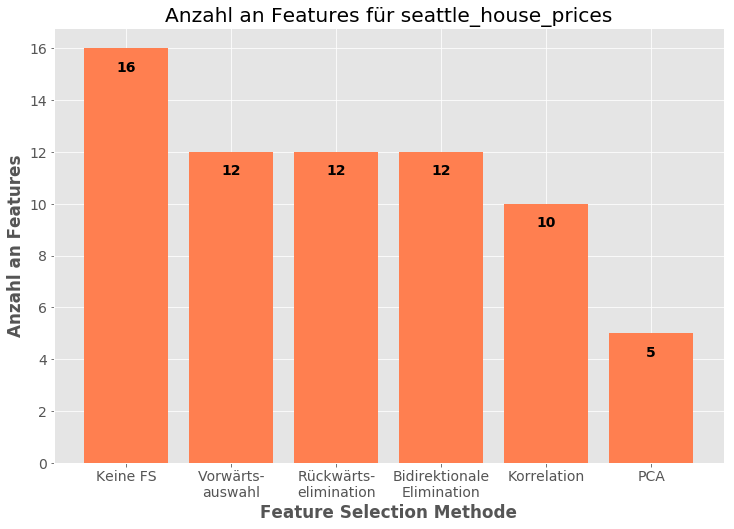

In [35]:
plot_num_features('seattle_house_prices')

In [36]:
#for dataset_name in dataset_names:
#    plot_num_features(dataset_name)

Plots of the accuracy for one dataset and one model

In [37]:
def plot_r2_scores(dataset_name, r2_scores, model_name):
    global r2_scores_pca
    r2_values = []
    fs_names = []
    fs_methods = [fs_method for fs_method in list(r2_scores.keys()) if fs_method.startswith(dataset_name)]
    for fs_method in fs_methods:
        r2_values.append(r2_scores[fs_method])
        fs_names.append(fs_method.split(' - ')[1].strip())
    pca_method = str([pca for pca in list(r2_scores_pca.keys()) if (pca.startswith(dataset_name)) & (pca.find(model_name) > -1)][0])
    r2_values.append(r2_scores_pca[pca_method])
    fs_names.append('PCA')
    fs_names = pd.Series(fs_names).map({'no_feature_selection': 'Keine FS', 
                                        'forward_selection': 'Vorwärts-\nauswahl',
                                        'backward_elimination': 'Rückwärts-\nelimination', 
                                        'bidirectional_elimination': 'Bidirektionale\nElimination',
                                        'corr_feature_selection': 'Korrelation',
                                        'PCA': 'PCA'}).tolist()
    plt.figure(figsize=(12,8))
    plt.rcParams.update({'font.size': 14})
    plt.bar(fs_names, r2_values, color='coral')
    plt.title('Vorhersagegenauigkeiten für ' + dataset_name + ' (' + model_name + ')')
    plt.xlabel('Feature Selection Methode', fontweight='bold')
    plt.ylabel('Korrigiertes Bestimmtheitsmaß', fontweight='bold')
    shift = np.max(r2_values) / 18
    for i, v in enumerate(r2_values):
        plt.text(i - .2, v - shift, '{0:.3f}'.format(np.round(v, 3)), color='black', fontweight='bold')
    plt.show()

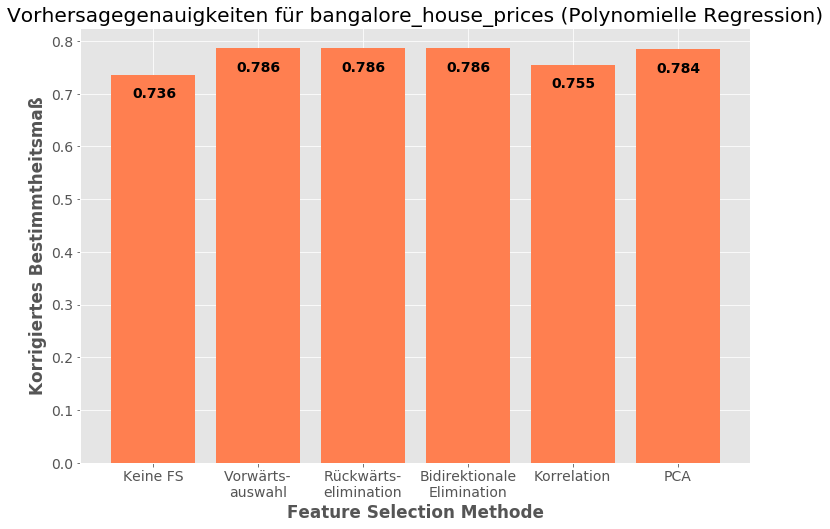

In [38]:
plot_r2_scores('bangalore_house_prices', r2_scores_poly, 'Polynomielle Regression')

In [39]:
#for dataset_name in dataset_names:
#    for r2_scores, model_name in zip([r2_scores_lin_reg, r2_scores_poly, r2_scores_r_forest],
#                                     ['Lineare Regression', 'Polynomielle Regression', 'Random Forest']):
#        plot_r2_scores(dataset_name, r2_scores, model_name)

Plots of the accuracy for one dataset and all models

In [40]:
def plot_r2_scores_all_models(dataset_name, legend_loc='lower right'):
    global r2_scores_lin_reg, r2_scores_poly, r2_scores_r_forest, r2_scores_pca
    r2_values_lin_reg = []
    r2_values_poly = []
    r2_values_r_forest = []
    fs_names = []
    fs_methods = [fs_method for fs_method in list(r2_scores_lin_reg.keys()) if fs_method.startswith(dataset_name)]
    for fs_method in fs_methods:
        r2_values_lin_reg.append(r2_scores_lin_reg[fs_method])
        r2_values_poly.append(r2_scores_poly[fs_method])
        r2_values_r_forest.append(r2_scores_r_forest[fs_method])
        fs_names.append(fs_method.split(' - ')[1].strip())
    pca_method_lin_reg = str([pca for pca in list(r2_scores_pca.keys()) if (pca.startswith(dataset_name)) & (pca.find('Lineare Regression') > -1)][0])
    pca_method_poly = str([pca for pca in list(r2_scores_pca.keys()) if (pca.startswith(dataset_name)) & (pca.find('Polynomielle Regression') > -1)][0])
    pca_method_r_forest = str([pca for pca in list(r2_scores_pca.keys()) if (pca.startswith(dataset_name)) & (pca.find('Random Forest') > -1)][0])
    r2_values_lin_reg.append(r2_scores_pca[pca_method_lin_reg])
    r2_values_poly.append(r2_scores_pca[pca_method_poly])
    r2_values_r_forest.append(r2_scores_pca[pca_method_r_forest])
    fs_names.extend(['PCA', 'PCA', 'PCA'])
    fs_names = pd.Series(fs_names).map({'no_feature_selection': 'Keine Feature Selection', 
                                        'forward_selection': 'Vorwärtsauswahl',
                                        'backward_elimination': 'Rückwärtselimination', 
                                        'bidirectional_elimination': 'Bidirektionale Elimination',
                                        'corr_feature_selection': 'Korrelationsbasiert',
                                        'PCA': 'PCA'}).tolist()
    plt.figure(figsize=(18,8))
    plt.rcParams.update({'font.size': 14})
    x = np.arange(3)
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:cyan', 'tab:olive']
    j = -0.375
    for i in range(len(r2_values_lin_reg)):
        plt.bar(x + j, [r2_values_lin_reg[i], r2_values_poly[i], r2_values_r_forest[i]], 
                width=0.15, color=colors[i], label=fs_names[i])
        j += 0.15
    plt.xticks(x, ['Lineare\nRegression', 'Polynomielle\nRegression', 'Random\nForest'])
    plt.title('Vorhersagegenauigkeiten für ' + dataset_name)
    plt.xlabel('Maschinelles Lernverfahren', fontweight='bold')
    plt.ylabel('Korrigiertes Bestimmtheitsmaß', fontweight='bold')
    y_shift = np.max(np.maximum.reduce([r2_values_lin_reg, r2_values_poly, r2_values_r_forest])) / 18
    i = 0
    for r2_values in [r2_values_lin_reg, r2_values_poly, r2_values_r_forest]:
        #y_shift = np.max(r2_values) / 18
        x_shift = -0.445
        for v in r2_values:
            if v > 0:
                plt.text(i + x_shift, v - y_shift, '{0:.3f}'.format(np.round(v, 3)), color='black', fontweight='bold')
            else:
                plt.text(i + x_shift, v + y_shift, '{0:.3f}'.format(np.round(v, 3)), color='black', fontweight='bold')
            x_shift += .15
        i += 1
    plt.legend(loc=legend_loc, framealpha=1, facecolor='white')
    plt.show()

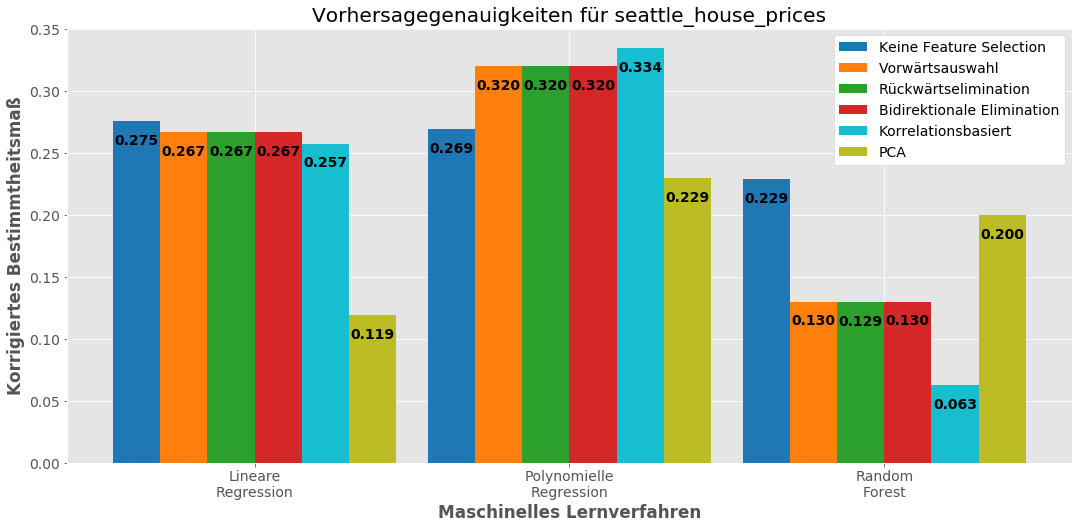

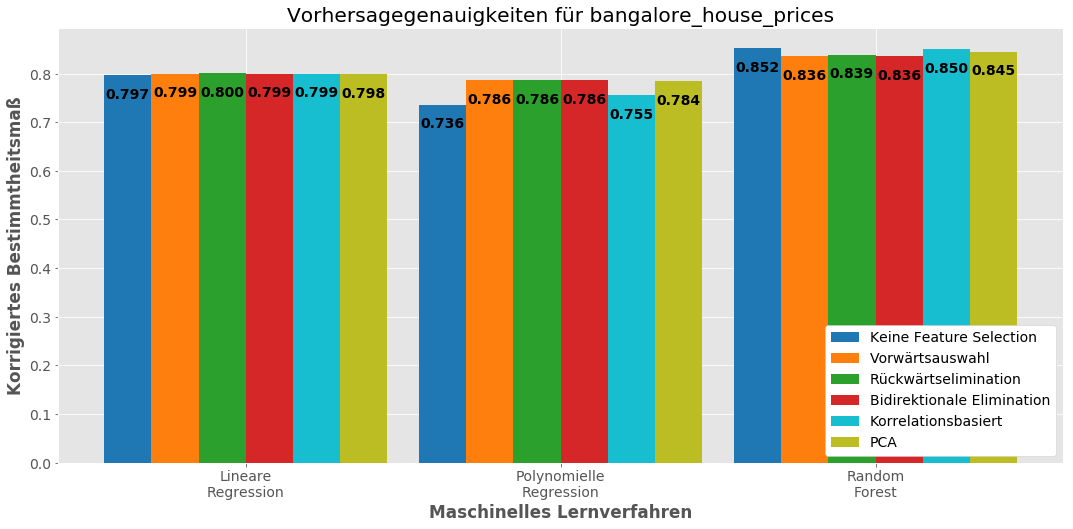

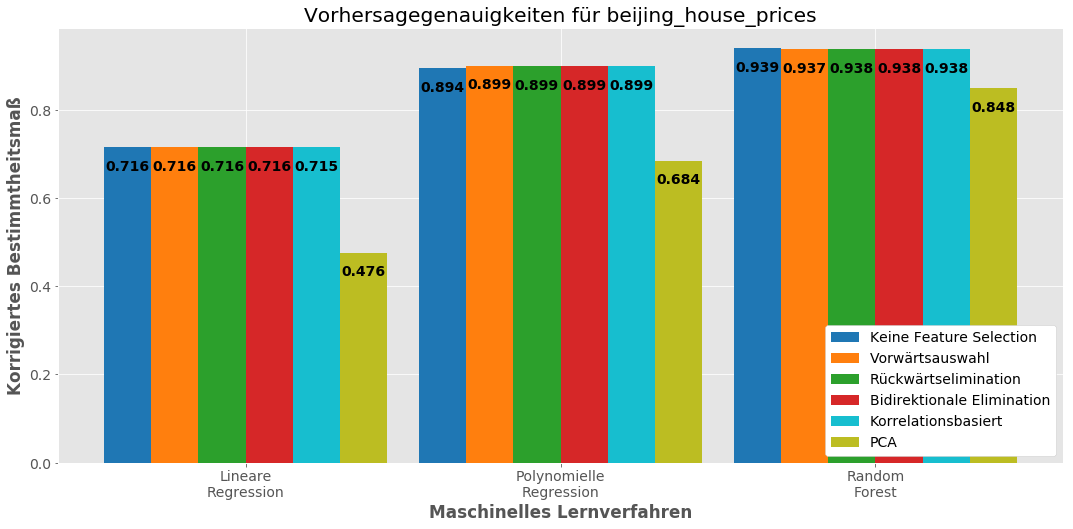

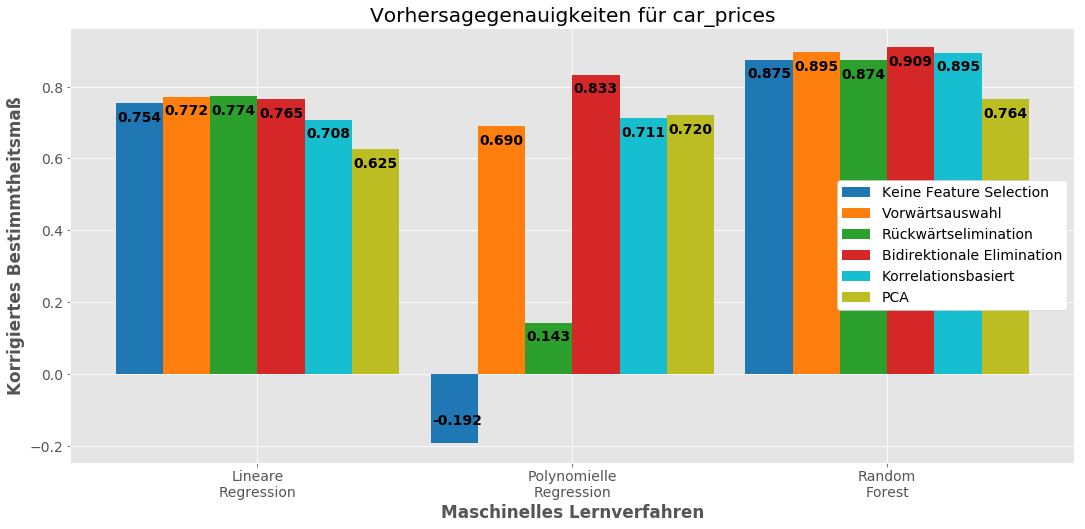

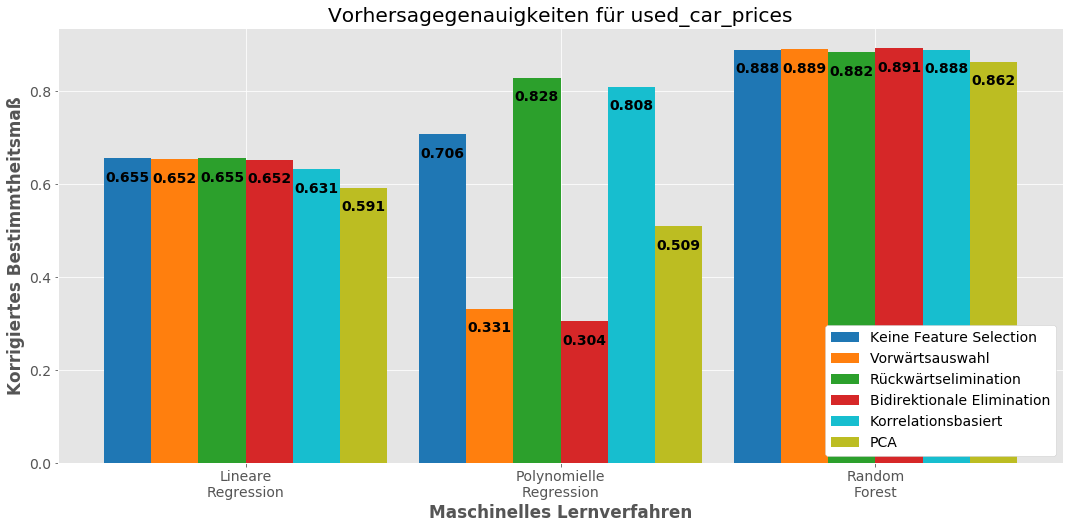

In [41]:
legend_locs = ['upper right', 'lower right', 'lower right', 'right', 'lower right']
for dataset_name, legend_loc in zip(dataset_names, legend_locs):
    plot_r2_scores_all_models(dataset_name, legend_loc)